In [1]:
from hstar import process
from hstar import trilinear
from hzz import angles
from hzz import zcandidate

import numpy as np
import matplotlib.pyplot as plt

2024-11-12 18:50:52.612029: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 18:50:56.226607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731433857.429896   54365 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731433857.806527   54365 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 18:51:00.324248: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
sample = process.Sample(weight='wt', 
    amplitude = process.Basis.SBI, components = {
    process.Basis.SBI: 'msq_sbi_sm',
    process.Basis.SIG: 'msq_sig_sm',
    process.Basis.BKG: 'msq_bkg_sm',
    process.Basis.INT: 'msq_int_sm'
  })

sample.open(csv = [
  '../ggZZ2e2m_all_new.csv',
  '../ggZZ4e_all_new.csv',
  '../ggZZ4m_all_new.csv'
  ], xs=[1.4783394, 0.47412769, 0.47412769],
    lumi=3000., k=1.83, nrows=1000000
)

0         1.321101e-08
1         1.385220e-08
2         7.684028e-09
3         1.018935e-10
4         8.890962e-09
              ...     
999995    3.815387e-12
999996    7.528436e-10
999997    1.252072e-08
999998    2.359891e-11
999999    2.170811e-09
Name: msq_sbi_sm, Length: 3000000, dtype: float64
0         2.382808e-10
1         1.464347e-10
2         6.720609e-11
3         2.016794e-12
4         1.242170e-10
              ...     
999995    3.495898e-14
999996    5.119940e-10
999997    1.920055e-09
999998    3.205660e-13
999999    3.996713e-10
Name: msq_sig_sm, Length: 3000000, dtype: float64
0         1.385620e-08
1         1.429392e-08
2         7.944366e-09
3         1.039613e-10
4         9.308479e-09
              ...     
999995    3.756239e-12
999996    5.996424e-10
999997    1.205474e-08
999998    2.440631e-11
999999    1.528986e-09
Name: msq_bkg_sm, Length: 3000000, dtype: float64
0        -8.834698e-10
1        -5.881569e-10
2        -3.275441e-10
3        -4.084575e-12

In [3]:
zmasses = zcandidate.ZmassPairChooser(sample)
leptons = zmasses.find_Z()

kinematics, legal_inds = angles.calculate(leptons[:,0], leptons[:,1], leptons[:,2], leptons[:,3])

kinematics = kinematics[legal_inds]
zmasses.df = zmasses.df.take(legal_inds)
zmasses.sample.events = zmasses.df

leptons = leptons[legal_inds]

c6_mod = trilinear.Modifier(c6_values = [-5,-1,0,1,5], c6_amplitudes = ['msq_sbi_c6_6', 'msq_sbi_c6_10', 'msq_sbi_c6_11', 'msq_sbi_c6_12', 'msq_sbi_c6_16'])
c6_weights = c6_mod.modify(sample=zmasses.sample, c6=[-20,-10,10,20,30])

0
(2, 3000000) [[( 15.398377,   19.76424 ,   21.50946  ,  96.9523 )
  (  8.74003 ,   -5.23892 ,   22.305943 ,  95.37584)
  ( -6.864384,   66.74868 ,   44.83151  , 121.39362) ...
  ( -9.053239,  -29.6314  , -301.77582  , 317.08115)
  (  9.07671 ,   -5.840747,    6.3665413, 104.53781)
  ( 45.571387, -107.12389 , -205.15764  , 253.0138 )]
 [(-15.39838 ,  -19.76424 ,  119.5777   , 152.60945)
  ( -8.74003 ,    5.23891 ,  -18.21909  ,  93.11914)
  (  6.864387,  -66.74869 ,   46.77064  , 122.35117) ...
  (  9.05324 ,   29.631407,  100.2714   , 138.99441)
  ( -9.076713,    5.84075 ,   20.8383   ,  95.45275)
  (-45.571396,  107.12389 , -121.90502  , 191.26701)]]
(array([], dtype=int64),)
[]
0


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33459/3494999926.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel(u'$\mathrm{cos}(\\theta^*)$ []')


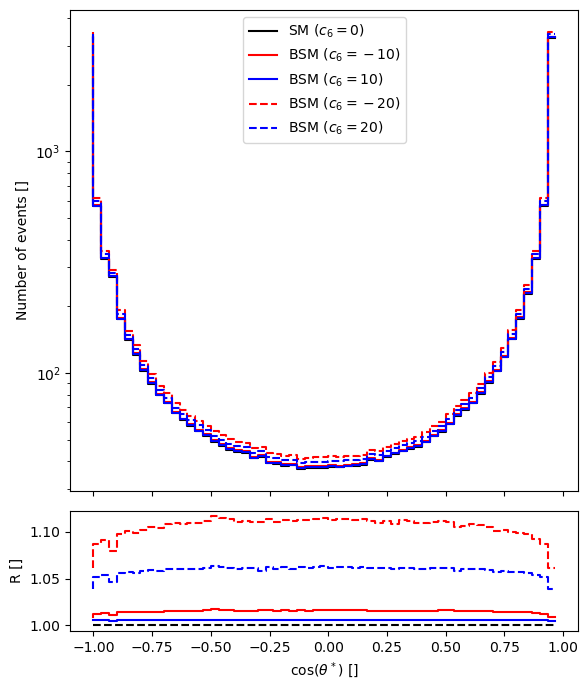

In [30]:
cth_str = kinematics[:,0]

hist, bins = np.histogram(cth_str, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth_str, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta^*)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33459/3892873133.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel(u'$\mathrm{cos}(\\theta_1)$ []')


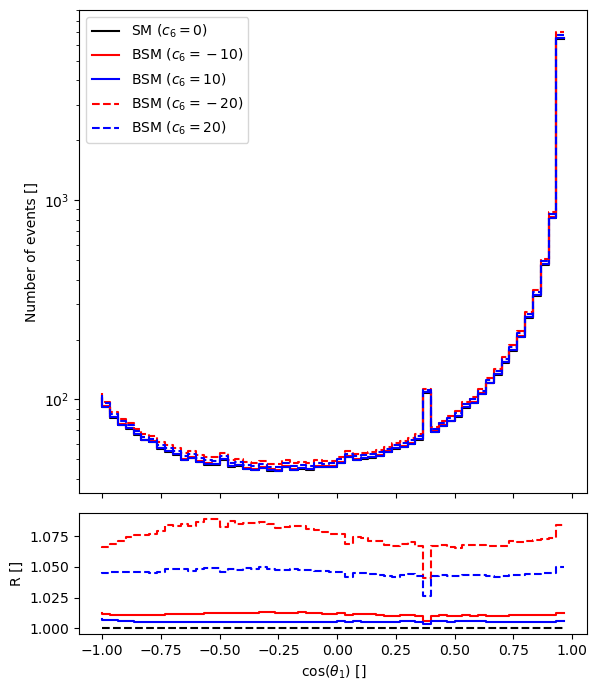

In [31]:
cth1 = kinematics[:,1]

hist, bins = np.histogram(cth1, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth1, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_1)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33459/3967585327.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel(u'$\mathrm{cos}(\\theta_2)$ []')


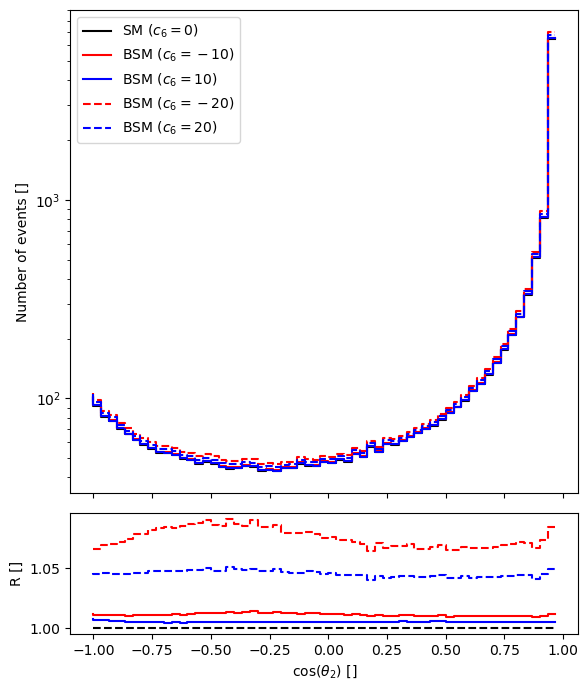

In [32]:
cth2 = kinematics[:,2]

hist, bins = np.histogram(cth2, bins=60, range=(-1,1), weights=sample.events['wt'])
hist1, bins1 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(cth2, bins=60, range=(-1,1), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\mathrm{cos}(\\theta_2)$ []')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_33459/3439171047.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xlabel(u'$\phi_1$ [rad]')


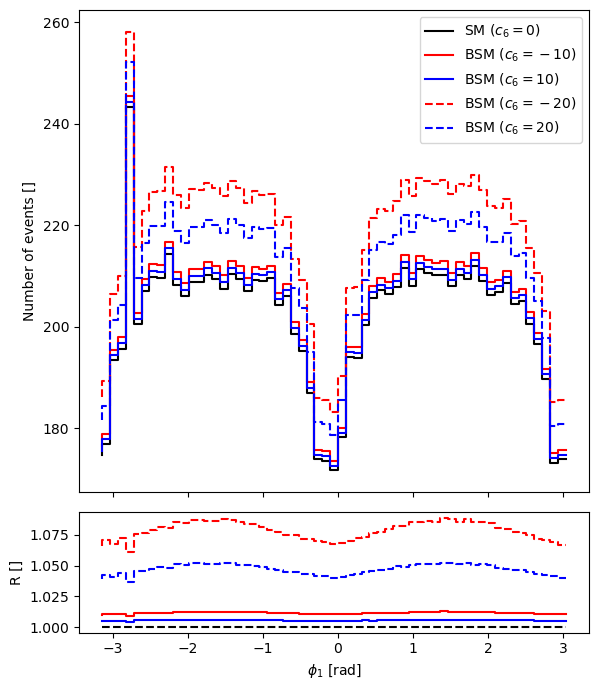

In [33]:
phi1 = kinematics[:,3]

hist, bins = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=sample.events['wt'])
hist1, bins1 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(phi1, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\phi_1$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_33459/508416856.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_xlabel(u'$\phi$ [rad]')


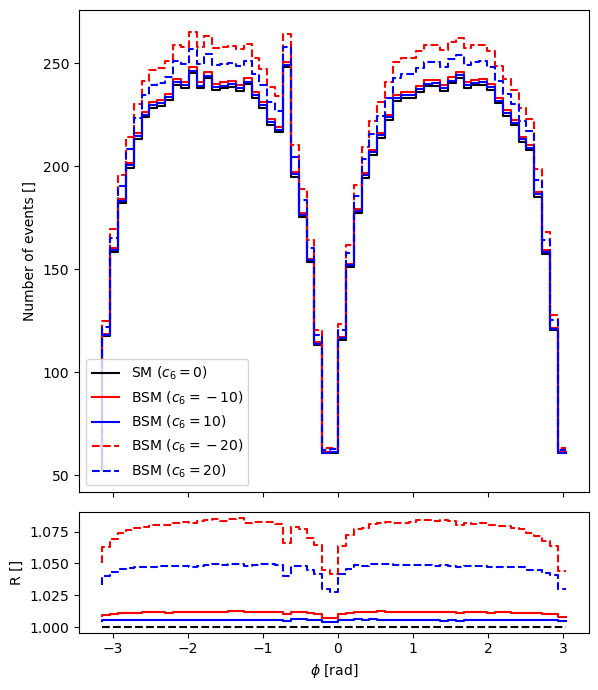

In [34]:
phi = kinematics[:,4]

hist, bins = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=sample.events['wt'])
hist1, bins1 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[1])
hist2, bins2 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[2])
hist3, bins3 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[0])
hist4, bins4 = np.histogram(phi, bins=60, range=(-np.pi,np.pi), weights=c6_weights.T[3])

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(6,7))

ax1.set_xticklabels([])

ax1.step(bins[:-1], hist, color='k', label=u'SM ($c_6=0$)')
ax1.step(bins[:-1], hist1, color='r', label=u'BSM ($c_6=-10$)')
ax1.step(bins[:-1], hist2, color='b', label=u'BSM ($c_6=10$)')

ax1.step(bins[:-1], hist3, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax1.step(bins[:-1], hist4, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

ax2.step(bins[:-1], hist/hist, color='k', linestyle='--', label=u'SM ($c_6=0$)')
ax2.step(bins[:-1], hist1/hist, color='r', label=u'BSM ($c_6=-10$)')
ax2.step(bins[:-1], hist2/hist, color='b', label=u'BSM ($c_6=10$)')

ax2.step(bins[:-1], hist3/hist, color='r', linestyle='--', label=u'BSM ($c_6=-20$)')
ax2.step(bins[:-1], hist4/hist, color='b', linestyle='--', label=u'BSM ($c_6=20$)')

ax2.set_xlabel(u'$\phi$ [rad]')
ax2.set_ylabel('R []')
#ax2.set_ybound(0.99,1.02)

fig.tight_layout()

plt.show()